In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

In [2]:
pwd

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images'

In [6]:
test_path = 'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images'+'\\test\\'
train_path = 'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images'+'\\train\\'


In [4]:
test_path

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\test\\'

In [7]:
import os
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
para_cells= train_path+'parasitized'
os.listdir(para_cells)[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

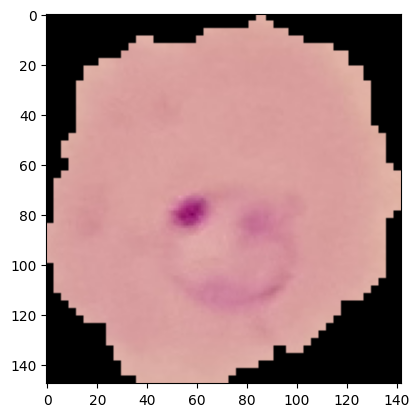

In [13]:
para_cell= para_cells+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell= imread(para_cell)
plt.imshow(para_cell)

In [14]:
para_cell.shape

(148, 142, 3)

In [19]:
unifec_path= test_path+'\\uninfected'
uninfected_cell = os.listdir(unifec_path)[0]

In [16]:
uninfected_cell

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

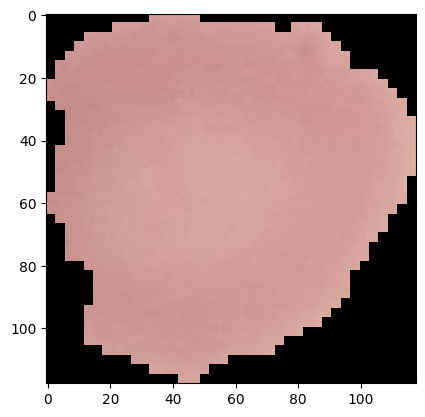

In [20]:
uninfected_cell= imread(unifec_path+'\\'+uninfected_cell)
plt.imshow(uninfected_cell)

In [21]:
uninfected_cell.shape

(118, 118, 3)

the shape of infected is (148, 142, 3) and the shape of unifected cells is (118, 118, 3) we need to find a balance between them by taking the mean or jointplot

to plot the joint plot and for taking the mean we need to create 2 arrays for storing the different dimensions

In [27]:
dim1=[]
dim2=[]

for image_path in os.listdir(test_path+'uninfected\\'):
    img= imread(test_path+'uninfected\\'+image_path)
    d1,d2,colors= img.shape
    dim2.append(d2)
    dim1.append(d1)

In [22]:
train_path

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images\\train\\'

In [23]:
test_path

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images\\test\\'

In [26]:
os.listdir(test_path+'uninfected\\')

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [28]:
np.mean(dim1)

130.92538461538462

In [29]:
np.mean(dim2)

130.75

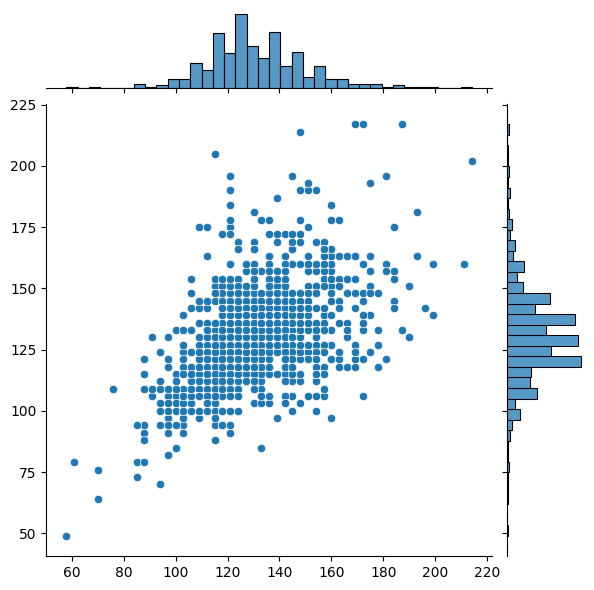

In [30]:
import seaborn as sns
sns.jointplot(x=dim1, y=dim2)

from mean of dim1, dim2 and the joint plot we can see that the avg size should be (130,130,3)

In [31]:
image_shape= (130,130,3)

## Data preparation for the model

As we can see that the dataset is huge and can't be supplied to the model at once, so we'll use keras built-in generator ftn to process the data, generate flow of batches from a directory and also manipulate the images

it is usually good idea to manipulate the images by rotating, scaling, cropping it so that our model becomes robust

In [32]:
from keras.preprocessing.image import ImageDataGenerator
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [33]:
image_gen= ImageDataGenerator(rotation_range=20, width_shift_range=0.10, height_shift_range=0.10,shear_range=0.1,zoom_range=0.1,fill_mode='nearest', horizontal_flip=True, rescale=1/255 )

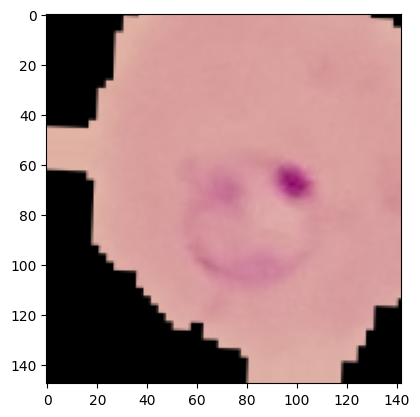

In [34]:
plt.imshow(image_gen.random_transform(para_cell))

now we'll use .flow_from_directory to start the flow of images in batches by the ImageDataGenerator. But it requires the data/images to be 
organized in class-based directories

In [35]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [36]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


now with the help of generator function we can feed the data in batches to the model without overloading it

## creating the model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3, 3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3, 3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)

before we train our model we need to create the train and test batches

In [40]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions

In [43]:
batch_size=16

In [44]:
train_image_batches= image_gen.flow_from_directory(train_path, target_size=image_shape[:2], batch_size=batch_size,color_mode='rgb', class_mode='binary')
test_image_batches= image_gen.flow_from_directory(test_path,target_size=image_shape[:2], batch_size=batch_size, color_mode='rgb', class_mode='binary', shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [41]:
image_shape

(130, 130, 3)

In [42]:
image_shape[:2]

(130, 130)

In [45]:
train_image_batches.class_indices

{'parasitized': 0, 'uninfected': 1}

In [46]:
results= model.fit_generator(train_image_batches, epochs=15, callbacks=[early_stopping], validation_data=test_image_batches)

C:\Users\dell\AppData\Local\Temp\ipykernel_6204\281815945.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results= model.fit_generator(train_image_batches, epochs=15, callbacks=[early_stopping], validation_data=test_image_batches)


Epoch 1/15
1560/1560 [==============================] - 1107s 708ms/step - loss: 0.3649 - accuracy: 0.8500 - val_loss: 0.1812 - val_accuracy: 0.9435
Epoch 2/15
1560/1560 [==============================] - 989s 634ms/step - loss: 0.1780 - accuracy: 0.9448 - val_loss: 0.1788 - val_accuracy: 0.9442
Epoch 3/15
1560/1560 [==============================] - 981s 629ms/step - loss: 0.1668 - accuracy: 0.9484 - val_loss: 0.1668 - val_accuracy: 0.9446
Epoch 4/15
1560/1560 [==============================] - 980s 628ms/step - loss: 0.1629 - accuracy: 0.9495 - val_loss: 0.1593 - val_accuracy: 0.9473
Epoch 5/15
1560/1560 [==============================] - 983s 630ms/step - loss: 0.1608 - accuracy: 0.9499 - val_loss: 0.1518 - val_accuracy: 0.9477
Epoch 6/15
1560/1560 [==============================] - 985s 631ms/step - loss: 0.1597 - accuracy: 0.9510 - val_loss: 0.1495 - val_accuracy: 0.9473
Epoch 7/15
1560/1560 [==============================] - 1005s 644ms/step - loss: 0.1539 - accuracy: 0.9508 - va

<AxesSubplot: >

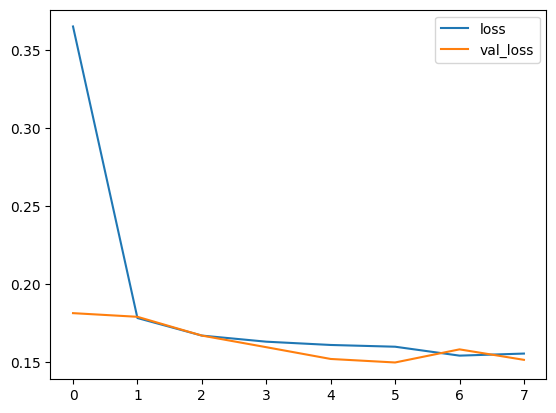

In [47]:
metrics_df= pd.DataFrame(model.history.history)
metrics_df[['loss', 'val_loss']].plot()

In [48]:
pred_prob= model.predict_generator(test_image_batches)

C:\Users\dell\AppData\Local\Temp\ipykernel_6204\2291328150.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_prob= model.predict_generator(test_image_batches)


In [49]:
pred_prob

array([[2.5458739e-03],
       [1.8154997e-04],
       [5.2066293e-04],
       ...,
       [9.8913103e-01],
       [9.6229035e-01],
       [9.1753364e-01]], dtype=float32)

In [50]:
predictions= pred_prob>0.5

In [51]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [52]:
from sklearn.metrics import classification_report

print(classification_report(test_image_batches.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [55]:
para_cells

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images\\train\\parasitized'

In [56]:
test_image_batches.image_shape

(130, 130, 3)

In [57]:
para_cell.shape

(148, 142, 3)

In [59]:
from keras.utils.image_utils import load_img

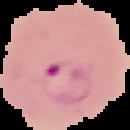

In [64]:
my_img = load_img(path='c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=image_shape)
my_img

In [62]:
os.listdir(para_cells)[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [63]:
para_cells

'c:\\data science practice\\python practice\\5.Deep Learning\\8. cnn on real images\\cell_images\\train\\parasitized'

In [66]:
from keras.utils.image_utils import img_to_array
my_img1= img_to_array(my_img)
my_img1

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [67]:
my_img1.shape

(130, 130, 3)

In [68]:
test_image_batches.image_shape

(130, 130, 3)

In [69]:
my_img1 = np.expand_dims(my_img, axis=0)

In [70]:
my_img1.shape

(1, 130, 130, 3)

In [71]:
model.predict(my_img1)

1/1 [==============================] - 0s 160ms/step


array([[0.]], dtype=float32)